Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Marco Conati"
COLLABORATORS = ""

---

**IMPORTANT**

Please name your notebook in the following format:

**e208-hw2-[your_last_name].ipynb**

# Assignment 2

The goal of this assignment is to give you experience working with gradient descent.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import pandas as pd

### Important:
- Please write your answers only in the designated cells. 
- Remove all `raise NotImplementedError()` lines from your final submission.
- Before submitting your assignment, make sure it runs without error (Kernel -> Restart & Run All).

### Problem 1: Curve fitting with polynomials

In this problem, you will use gradient descent to fit a polynomial function to some data points.

First, let's generate the sample data by taking a second-order polynomial and adding random noise.

In [4]:
def generateData(N):
    w = np.array([2.5, 8.2, 2.7]) # true polynomial coefficients
    np.random.seed(0)
    x = np.random.uniform(-3, 3, size = N)
    noise = np.random.normal(0, 1, size = N)
    y = w[0] + w[1] * x + w[2] * x * x + noise
    return x, y, w

In [5]:
x, y, w_true = generateData(30)

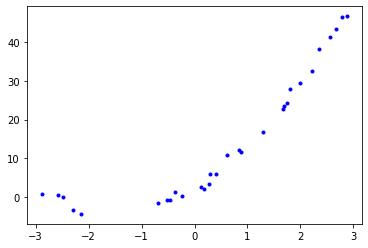

In [6]:
plt.plot(x, y, 'b.')
plt.show()

You will implement batch gradient descent to estimate the coefficients of a second order polynomial, i.e. $a_0 + a_1 x + a_2 x^2$.  Your work should include:
- A mathematical derivation of the update equation for minimizing mean squared error
- A plot of MSE vs iteration (number of batch gradient steps) for three different learning rates (all of which should converge).  Describe in words how the learning rate affects the algorithm.
- A plot showing the original data with the estimated polynomial overlaid
- A discussion of some of the challenges and problems you faced in getting the algorithm to converge correctly

Be sure to write your code so it is readable.  Part of your grade will be on the readability of your notebook.

**Derive batch gradient descent update equation here**

What are your variable names? 

What is your cost function? 

What is the generic expression for your update rule? (Don't compute the derivative) 

What are the gradients?

What is the specific expression for your update rule?

### SOLUTION BELOW:

#### What are your variable names?
First, lets define some matricies as our variables:

I'll condense the weights a0, a1, a2 into a matrix W, where:

W = \begin{bmatrix}
a_0 & a_1 & a_2
\end{bmatrix}

Let's also define an X matrix where each row has xi^2, xi, and 1 for each xi in the dataset

X = \begin{bmatrix}
1&x_0&x_0 ^2\\
1&x_1&x_1 ^2\\
...\\
1&x_n&x_n ^2
\end{bmatrix}

Finally, lets reorder our targets y into a matrix Y:
Y = \begin{bmatrix}
y_0\\
y_1\\
...\\
y_n
\end{bmatrix}

#### What is your cost function? 
The cost function is MSE:

MSE = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$

Plugging in the variables from above, we can get rid of the sum

error = $\frac{1}{n} (Y-XW)^T * (Y-XW)$

With some algebra:

error =  $\frac{1}{n}(Y^T Y-2W^T X^T Y + W^T X^T XW)$

#### What is the general update rule?
The update rule for gradient descent is:

Set hyperparameters. The hyperparameters are the number of iterations numIter and the learning rate L
(Its usually gamma but I'm not sure how to make a gamma)

Initialize weights W randomly

$for\ i\ in\ range(numIter):\\
           W = W - dW$ (Where dW is the gradient given by the derivative of the error with respect to weights)
           
#### What are the gradients?
Taking the derivative of our cost function gives the derivative of the error with respect to weights(the gradient)

From above:

error =  $\frac{1}{n}(Y^T Y-2W^T X^T Y + W^T X^T XW)$

Taking the derivative

$de/dw=  \frac{1}{n}(-2 X^T Y + 2X^T XW)$

#### What is the specific expression for your update rule?

Set hyperparameters. The hyperparameters are the number of iterations numIter and the learning rate L
(Its usually gamma but I'm not sure how to make a gamma)

Initialize weights W randomly

$for\ i\ in\ range(numIter):\\
           W = W - \frac{1}{n}(-2 X^T Y + 2X^T XW)$ (Where dW is the gradient given by the derivative of the error with respect to weights)
           
           
#### Turns out with some clever defining of the matrix X, this becomes just like multivariable linear regression!
           

First let's implement a mean squared error cost function.

In [7]:
# Start your cost function (Mean Square Error) here: 
def MSE(x,w,y):
    '''
    Inputs: 
        x: an Numpy array of input data 
        w: an Numpy array of weights for our approximated polynomial
        y: an Numpy array of target values
    Returns: 
        Mean squared error
    '''
    #First, I need to rearrange x into the matrix X I defined above
    x = np.array([x])
    X = np.hstack((np.ones(x.shape).transpose(), x.transpose(), np.square(x).transpose()))
    #Then, find N for MSE
    N = x.shape[1]
    mse = 1/N * (y.dot(y) - 2*w.dot(X.T).dot(y) + w.dot(X.T).dot(X.dot(w)))

    return mse

We will provide some tests along the way to help you verify your implementations.

In [8]:
# correctness test for MSE
assert(np.allclose(MSE(np.array([1,2,3,4]),np.array([1,2,3]),np.array([1,2,3,4])),1005, atol=2))

In [9]:
def grad(x,w,y):
    '''
    Inputs: 
        x: an Numpy array of input data 
        w: an Numpy array of weights for our approximated polynomial
        y: an Numpy array of target values
    Returns: 
        gradient of the weights
    '''
    #First, I need to rearrange x into the matrix X I defined above
    x = np.array([x])
    X = np.hstack((np.ones(x.shape).transpose(), x.transpose(), np.square(x).transpose()))

    N = x.shape[1]
    #Calculate the gradient
    grad = 1/N * (-2 *y.dot(X)+2*X.T.dot(X).dot(w))
    return grad

Now we will implement the gradient descent function.

In [10]:
def gradient_descent(x, y, w, lr, num_steps):
    '''
    Implements gradient descent for the second-order polynomial model.
    
    Inputs:
        x - a numpy array of input data 
        y - a numpy array of labels
        w - initial parameter guess
        lr - learning rate
        num_steps - number of iterations 
    Returns:
        final weights and history of MSE for each iteration
    '''
    losses = []
    N = len(x)
    for i in range(num_steps):
        # compute loss 
        mse = MSE(x,w,y)
        losses.append(mse)
        
        wgrad = np.zeros(3)
        # compute gradient
        wgrad = grad(x,w,y)
        
        
        # update parameters
        w = w - lr*wgrad

    return w, losses

In [11]:
# correctness test for gradient descent
w, losses = gradient_descent(np.array([1,0,2,3,4]),np.array([4,2,5,8,0]),np.array([0,0,0]), 0.001, 1000)
w_ans = np.array([2.10973282,  2.37200665, -0.57461083])
assert(np.allclose(w , w_ans, atol=0.1))

Now let's implement a helper function for plotting our results.  Use the [plt.subplots](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html) command.

In [12]:
def display_losses_and_fit(x, y, w, losses):
    '''
    Generates two figures side-by-side: 
        - A plot of MSE vs iteration
        - A scatterplot of the datapoints with the fitted quadratic overlaid
    
    Inputs:
        x - a numpy array of input data 
        y - a numpy array of labels
        w - weights for fitted quadratic
        losses - MSE for each time step
    '''
    #Generate the plot structure
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Losses on the left and fit to data on the right')
    ax1.plot(np.arange(len(losses)), losses)
    ax2.scatter(x, y)
    #x values for plotting line
    x_line = np.linspace(min(x), max(x), 1000)
    ax2.plot(x_line, w[0] + w[1]*x_line + w[2]*np.square(x_line))

Now let's visualize the results with three different learning rates (all of which should converge). Fill in the parameters in cells below. Do not change the variables names w1, w2, w3. Changing it will fail the autograding tests!

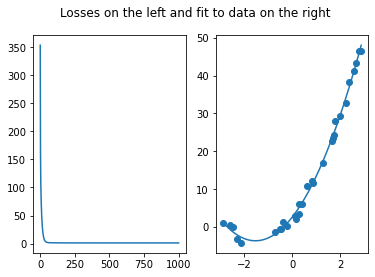

In [13]:
# Experiment with your first learning rate
w1, loss1 = gradient_descent(x,y,np.random.rand(3), 0.01, 1000)
display_losses_and_fit(x,y,w1,loss1)

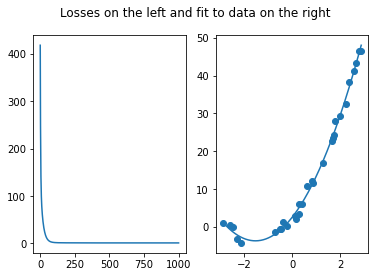

In [14]:
# Experiment with your first learning rate
w2, loss2 = gradient_descent(x,y,np.random.rand(3), 0.005, 1000)
display_losses_and_fit(x,y,w2,loss2)

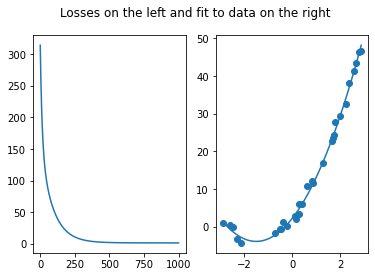

In [15]:
# Experiment with your first learning rate
w3, loss3 = gradient_descent(x,y,np.random.rand(3), 0.001, 1000)
display_losses_and_fit(x,y,w3,loss3)

In [16]:
# our estimated parameter should not be too far away from true value 
correct_w = np.array([2.5, 8.2, 2.7])
assert(np.allclose(w1,correct_w, atol=1))
assert(np.allclose(w2,correct_w, atol=1))
assert(np.allclose(w3,correct_w, atol=1))

**Discuss the effects of learning rate here**

Higher learning rate generally increases the speed of convergence(until the point gradient descent diverges). This makes sense since learning rate is multiplied by the gradient at each step in gradient descent, so a higher learning rate results in larger steps that reach the minimum faster. So, using a higher learning rate(that converges) will usually take less steps than a smaller learning rate.

The exception to this rule is a high learning rate that is just on the verge of divergence converges slowly. This is the case because the steps overshoot the minimum, but end up just slightly closer. An example of this is shown below:

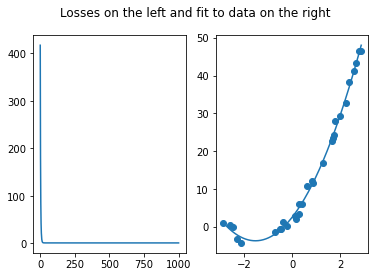

In [17]:
# High learning rate that converges fast
w4, loss4 = gradient_descent(x,y,np.random.rand(3), 0.05, 1000)
display_losses_and_fit(x,y,w4,loss4)

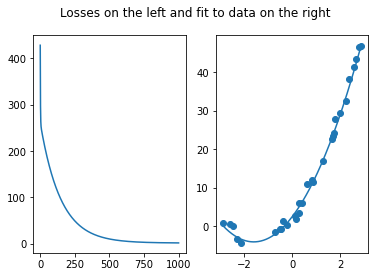

In [18]:
# Higher learning rate that converges much more slowly since 
#it is nearly divergent
w4, loss4 = gradient_descent(x,y,np.random.rand(3), 0.054, 1000)
display_losses_and_fit(x,y,w4,loss4)
# As a side note, increasing this learning rate by .001 causes divergence
# It is very nearly divergent!

**Discuss some of the challenges and problems you faced in getting the algorithm to converge correctly**

Picking a learning rate that is too large causes divergence. The model overshoots the minimum, and ends up with wildly incorrect weights. So, you have to be careful to pick a learning rate that doesn't create overly big steps

However, if you pick too small of a learning rate, convergence takes an extremely long time. This can be a waste of time and GPU resources for the programmer, especially with complex models

In short, it can be hard to find the learning rate window between timely convergence and divergence

### Problem 2: Acoustic Noise Cancellation

In this problem we will use the least mean squares (LMS) algorithm to perform noise cancellation in an airplane cockpit.  The pilot is speaking into a microphone in a very noisy environment.  We would like to cancel the background noise from the environment so that the speech is more audible.  

We can do this by placing a second microphone in the cockpit.  The purpose of the second microphone is to record (only) the cockpit noise, without picking up the pilot's speech.  We can then use these two microphones to perform noise cancellation using the LMS algorithm.  The block diagram for our system is shown below:

<img src="figs/blockDiagram_AIC.png" width="500"/>

The signal in the upper branch is the close-talking microphone which contains both the pilot's speech and the background noise.  The signal in the lower branch is the second microphone containing only background noise.  Note that noise signals in the upper and lower branches are not identical due to the effect of reverberation and microphone characteristics.  The noise signals are correlated but not identical.

We would like to learn the weights of the adaptive filter to cancel out as much of the background noise as possible.  This corresponds to finding the weights that minimize the mean square error between $d[n]$ and $y[n]$.  As shown in class, we can iteratively estimate these weights using the normalized LMS update equation

$$\hat{\mathbf{w}}[n+1] = \hat{\mathbf{w}}[n] + \epsilon \frac{\mathbf{x}[n] e[n]}{\mathbf{x}[n]^T \mathbf{x}[n]}$$

where $\hat{\mathbf{w}}[n]$ is a vector of the estimated weights at time $n$, $\mathbf{x}[n]$ is the L-dimensional vector $[x[n], x[n-1], ..., x[n-L+1]]^T$, $e[n] = d[n] - y[n]$, and $\epsilon$ is the learning rate.  Note that this is an application of stochastic gradient descent in which we estimate the direction of steepest descent based on a single sample $\mathbf{x}[n]$, rather than an entire data set.

$x[n]$ will be a 10 second noise signal.  We will synthesize $d[n]$ by taking a clean speech recording and adding filtered noise.  The filtered noise is $x[n]$ convolved with a room impulse response function.

In [19]:
def readAudio(infile):
    sr, audio = wavfile.read(infile)
    audio_norm = audio / 2.0**15 # normalize, assuming 16-bit representation
    return sr, audio_norm

In [20]:
sr, speech = readAudio('data/speech.wav')

In [21]:
# You can use the following function to embed audio directly in the notebook.
# This is useful for listening to audio interactively during data exploration.
# These embedded audio files make the notebook very large in memory, though, so 
# please remove these embedded audio files before submitting your assignment.
ipd.Audio('data/speech.wav', rate=sr)

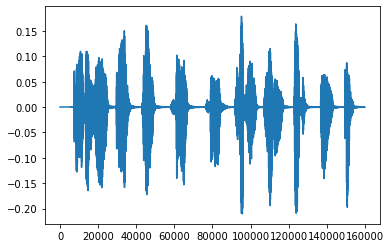

In [22]:
plt.plot(speech)
plt.show()

In [23]:
sr, noise = readAudio('data/noise.wav')

In [24]:
ipd.Audio('data/noise.wav', rate=sr)

In [25]:
def getRoomImpulseResponse(infile = 'data/rir.wav'):
    fs, rir = wavfile.read(infile)
    norm_factor = 1/np.sqrt(np.sum(rir * rir)) # normalization factor to avoid changing the power of the signal
    rir_norm = rir * norm_factor
    return fs, rir_norm

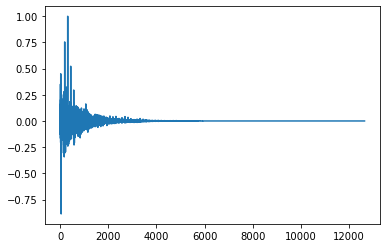

In [26]:
sr, rir = getRoomImpulseResponse()
plt.plot(rir)
plt.show()

Now we generate the noisy speech recording by adding the clean speech and the filtered noise.  Take a look at the documentation for [numpy.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) to understand what this is doing.

In [27]:
def generateNoisySpeech(cleanSpeech, noise, rir):
    '''
    Inputs
      cleanSpeech: the audio signal containing clean speech only
      noise: the audio signal containing cockpit noise only
      rir: the normalized room impulse response of the cockpit
    
    Returns
      noisySpeech: signal containing the mixture of clean speech and filtered noise
    '''
    L = min(len(cleanSpeech), len(noise)) # truncate to ensure signals are all the same length
    cleanSpeech = cleanSpeech[0:L]
    noise = noise[0:L]
    filteredNoise = np.convolve(noise, rir, mode = 'full')
    noisySpeech = cleanSpeech + filteredNoise[0:L]
    
    return noisySpeech

In [28]:
noisySpeech = generateNoisySpeech(speech, noise, rir)

In [29]:
ipd.Audio(noisySpeech, rate = sr)

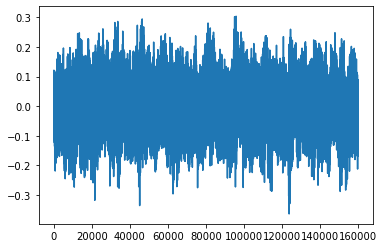

In [30]:
plt.plot(noisySpeech)
plt.show()

Our signal of interest is definitely buried deep in noise!

Now let's implement the LMS algorithm for noise cancellation.  In the normalized_lms function, you should:
- update the weight vector w
- append the estimation error at time n to the list of errors

In [31]:
def normalized_lms(d, x, window_len, eps):
    '''
    Inputs
      d : a numpy array containing the samples d[n]
      x : a numpy array containing the samples x[n]
      window_len : the number of weights in the adaptive filter
      eps : the learning rate for the LMS algorithm
    
    Returns
      w : estimated adaptive filter weights after processing all the data
      errors : a numpy array containing the estimation errors e[n]
    '''
    
    L = min(len(d), len(x)) # truncate signals to same length
    d = d[0:L]
    x = x[0:L]
    w = np.zeros(window_len) # filter weights
    errors = []
    learning_rate = eps
    #Iterate through the data
    for n in range(window_len - 1, len(d)):
        #Select the x window based on filter length
        xWindow = np.flip(x[(n-(window_len-1)):(n+1)])
        dWindow = d[(n-(window_len-1)):(n+1)]
        #calculate error
        e = d[n] - w.dot(xWindow)
        errors.append(e)
        dw = e*xWindow/(xWindow.dot(xWindow))
        #update weights
        w = w+learning_rate *dw
    errors = np.array(errors)
    return w, errors

In [32]:
filterLen = 4000
weights, errors = normalized_lms(noisySpeech, noise, filterLen, .1)

In [33]:
# test of correctness
w, _ = normalized_lms(noisySpeech, noise, 20, .1)
assert(np.allclose(w , np.array([-0.30055279, -0.12469387,  0.10871376,  0.22533691,  0.15354949,\
        0.20557837, -0.08221254,  0.20942972,  0.40539417,  0.13122204,\
        0.23365175,  0.21209817,  0.18864461,  0.33958361,  0.0035934 ,\
        0.42247655, -0.0762519 , -0.10181139,  0.3619645 ,  0.14460181]), atol=.5))

Let's plot the mean squared error over time to see if our predictions are getting better.  In the calcMSE function, you should:
- calculate the MSE at each time instant averaged over the most recent avg_win samples
- append the MSE to mse_traj

In [34]:
from tqdm import tqdm
def calcMSE(errors, avg_win = 1000):
    '''
    Inputs
      errors : numpy array containing the estimation errors e[n]
      
    Returns
      mse_traj : numpy array containing the mean squared error of the previous avg_win errors
    '''
    mse_traj = []
    for n in tqdm(range(avg_win - 1, len(errors))):
        #Use the equation for MSE!
        mse = (1/avg_win)*np.sum(np.square(errors[(n-(avg_win-1)):(n+1)]))
        mse_traj.append(mse)
       
    
    mse_traj = np.array(mse_traj)
    return mse_traj

In [35]:
# test of correctness
test_calcMSE = calcMSE(np.array([3,1,4,1,5,9,2,6,5,3,5,8,9,7,9,3,2,3,8,4,6,2,6]), avg_win = 10)
ans_calcMSE = np.array([20.7, 22.3, 28.6, 35.1, 39.9, 45.5, 38.3, 38.3, 35.6, 39.5, 40.2, 41.3, 35.3, 30.8])
assert(np.allclose(test_calcMSE,ans_calcMSE, atol=2))

100%|██████████| 14/14 [00:00<00:00, 81897.15it/s]


In [36]:
mse_traj = calcMSE(errors)

100%|██████████| 154904/154904 [00:00<00:00, 170552.68it/s]


In [37]:
# this cell is intentionally blank. Please do not modify this. 

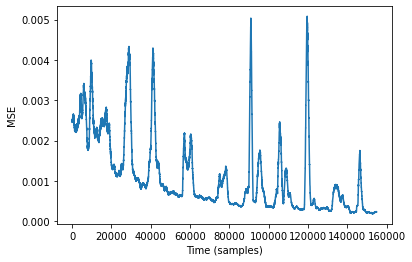

In [38]:
plt.plot(mse_traj)
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()

**Provide an interpretation of the plot above.  Does this behavior make sense?**: 


This answer does make sense. Generally, there seems to be a decaying function corresponding to LMS predicting the weights of the filter for cancelling noise. The adaptive filter is improving with new data and cancelling more and more background noise with each iteration

The spikes in the general decaying function also make sense. They correspond with instances of the pilot speaking into the microphone. Since the x[n] signal going into the adaptive filter only has the noise measurements, it can't learn to cancel the speech. So, when the pilot speaks, it results in a large spike of error as the speech makes it through the summing junction to the error signal

Let's compare the estimated room impulse response with the true room impulse response.

Text(0.5, 1.0, 'Estimated Room Impulse Response')

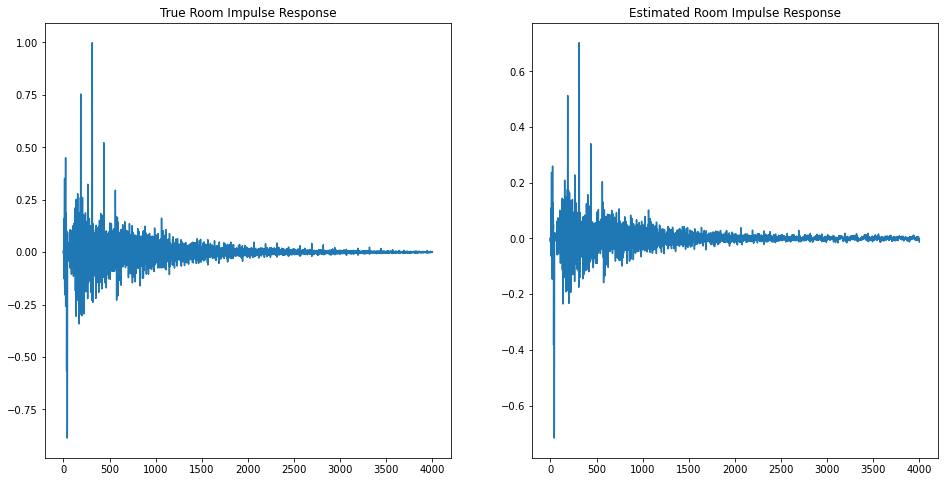

In [39]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(rir[0:filterLen])
plt.title('True Room Impulse Response')
plt.subplot(122)
plt.plot(weights)
plt.title('Estimated Room Impulse Response')

And we can also listen to the result to get an intuitive sense of how well the noise canceller is doing.  Notice how the performance improves over time.

In [40]:
ipd.Audio(errors, rate=sr)

### Problem 3: Temperature Prediction

In this problem we will use normalized LMS to see how well we can predict the average temperature one hour into the future.  We will use hourly temperature data collected from Santa Barbara.  The block diagram for our system is shown below:

<img src="figs/blockDiagram_Prediction.png" width="500"/>

Here, the delay block will simply be a unit delay, so that we are attempting to predict the temperature one hour into the future.

Let's start off by reading in the data.  We will use a package called pandas which is very useful for tabular data processing.  The function read_csv will read in a text file and create an object called a DataFrame.

In [41]:
df = pd.read_csv('data/tempData.txt', header=None, sep='\s+')

In [42]:
df.head() # useful function for inspecting the data

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,53152,20180101,100,20171231,1700,2.422,-119.88,34.41,13.4,13.7,...,0.032,0.083,0.122,0.246,-99.0,16.3,15.7,14.7,15.2,15.6
1,53152,20180101,200,20171231,1800,2.422,-119.88,34.41,13.4,13.6,...,0.034,0.086,0.122,0.246,-99.0,15.7,15.7,14.9,15.2,15.6
2,53152,20180101,300,20171231,1900,2.422,-119.88,34.41,10.6,11.3,...,0.029,0.087,0.122,0.246,-99.0,14.8,15.5,14.9,15.2,15.6
3,53152,20180101,400,20171231,2000,2.422,-119.88,34.41,9.7,10.2,...,0.030,0.086,0.124,0.246,-99.0,14.2,15.1,14.8,15.2,15.6
4,53152,20180101,500,20171231,2100,2.422,-119.88,34.41,8.1,9.1,...,0.027,0.083,0.124,0.246,-99.0,13.6,14.8,15.0,15.3,15.6


The tenth column contains hourly average temperature data (in Celsius) starting on January 1, 2018.

In [43]:
d = np.array(df[9])
d

array([13.7, 13.6, 11.3, ..., 15.2, 15.5, 15.4])

There are some erroneous measurements in this temperature data.  Your task below is to:
- investigate the data and identify the nature of the measurement errors
- replace the erroneous measurements with zeros.  The function [numpy.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) may be useful

Text(0, 0.5, 'Temperature(C)')

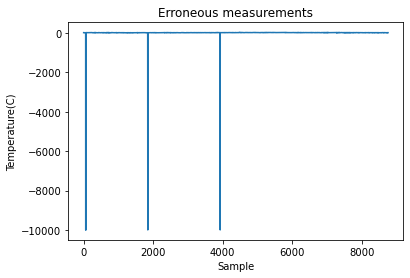

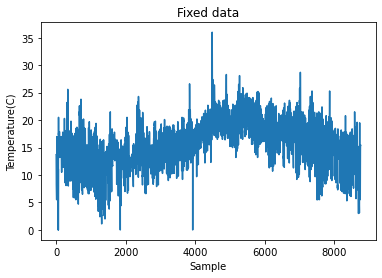

In [44]:
# replace the error measurements here

plt.plot(d)
plt.title('Erroneous measurements')
plt.xlabel('Sample')
plt.ylabel('Temperature(C)')
#erroneous measrements seem to be very negative
#Find them and replace with zeros
d = np.where(d<0, 0, d)
plt.figure()
plt.plot(d)
plt.title('Fixed data')
plt.xlabel('Sample')
plt.ylabel('Temperature(C)')

In [45]:
# This cell is intentionally blank. Please do not modify it. 

Now let's learn the filter weights using the normalized LMS algorithm and see how well we can predict temperature one hour into the future.  Your work should include the following:
- A plot of MSE vs time for three different learning rates, all of which should converge.  Use a filter length of 16 and compute the MSE over the most recent week (168 hours) of temperature measurements.
- For a fixed learning rate, compare the MSE vs time plots for several different sizes of the adaptive filter.  Compute the MSE over the most recent week of temperature measurements.  Do more filter weights mean a better prediction?
- How good are your predictions?  Give a quantitative characterization and explain your reasoning.
- Set the number of filter weights to 96, and look at the learned filter weights after running LMS on the data.  Do the learned filter weights make sense?  Include a plot of the filter weights and provide an interpretation.

You should re-use your functions from above, so this should not be many lines of code!

In [46]:
filterLen = 16
delayed = np.insert(d,0,0)[:-1]
#Run LMS on the three learning rates
weights1, errors1 = normalized_lms(d, delayed, filterLen, .2)
mse_traj1 = calcMSE(errors1)
weights2, errors2 = normalized_lms(d, delayed, filterLen, .1)
mse_traj2 = calcMSE(errors2)
weights3, errors3 = normalized_lms(d, delayed, filterLen, .05)
mse_traj3 = calcMSE(errors3)

100%|██████████| 7746/7746 [00:00<00:00, 175675.52it/s]


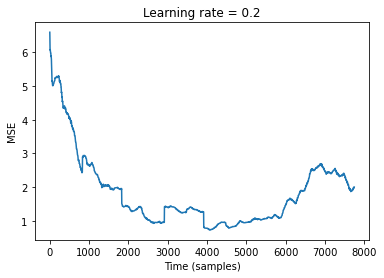

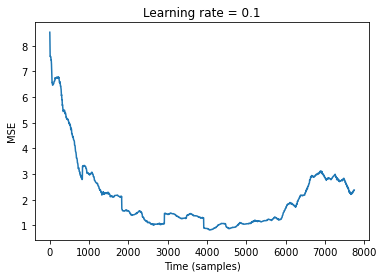

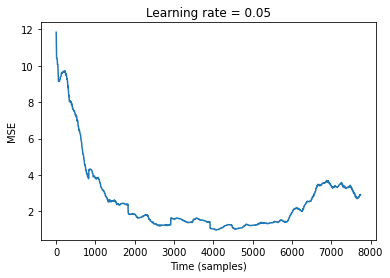

In [47]:
# Generate plots of MSE vs time for three different learning rates
plt.plot(mse_traj1)
plt.title('Learning rate = 0.2')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(mse_traj2)
plt.title('Learning rate = 0.1')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(mse_traj3)
plt.title('Learning rate = 0.05')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()

In [58]:
#Calculate MSE for each of the three errors
mse_week1 = calcMSE(errors1[-168:], 168)
mse_week2 = calcMSE(errors2[-168:], 168)
mse_week3 = calcMSE(errors3[-168:], 168)

print("For learning rate 0.2, MSE over the most recent week is: "+ str(mse_week1[0]))
print("For learning rate 0.1, MSE over the most recent week is: "+ str(mse_week2[0]))
print("For learning rate 0.05, MSE over the most recent week is: "+ str(mse_week3[0]))

100%|██████████| 1/1 [00:00<00:00, 2549.73it/s]

For learning rate 0.2, MSE over the most recent week is: 2.2325716752805693
For learning rate 0.1, MSE over the most recent week is: 2.388938680269881
For learning rate 0.05, MSE over the most recent week is: 3.364136425107237


For a higher learning rate, the filter seems to have lower error. This is likely because the filter is able to more quickly adjust weights to fit recent points

In [59]:
delayed = np.insert(d,0,0)
#Calculate weights and errors with LMS for three different filter amounts
weights1, errors1 = normalized_lms(d, delayed, 4, .1)
mse_traj1 = calcMSE(errors1)
weights2, errors2 = normalized_lms(d, delayed, 16, .1)
mse_traj2 = calcMSE(errors2)
weights3, errors3 = normalized_lms(d, delayed, 128, .1)
mse_traj3 = calcMSE(errors3)


100%|██████████| 7634/7634 [00:00<00:00, 150685.52it/s]


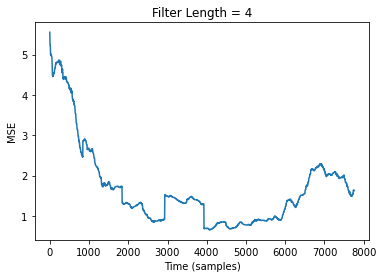

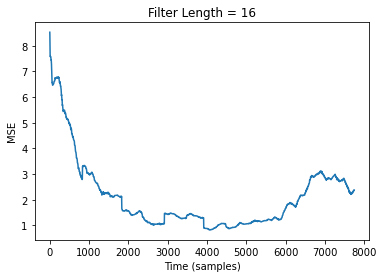

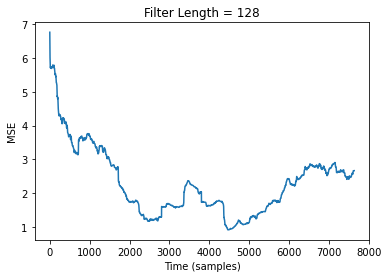

In [60]:
# Generate plots of MSE vs time for three different adaptive filter lengths
plt.plot(mse_traj1)
plt.title('Filter Length = 4')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(mse_traj2)
plt.title('Filter Length = 16')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(mse_traj3)
plt.title('Filter Length = 128')
plt.xlabel('Time (samples)')
plt.ylabel('MSE')
plt.show()

In [61]:
mse_week1 = calcMSE(errors1[-168:], 168)
mse_week2 = calcMSE(errors2[-168:], 168)
mse_week3 = calcMSE(errors3[-168:], 168)

print("For filter length 4, MSE over the most recent week is: "+ str(mse_week1[0]))
print("For filter length 16, MSE over the most recent week is: "+ str(mse_week2[0]))
print("For filter length 128, MSE over the most recent week is: "+ str(mse_week3[0]))

100%|██████████| 1/1 [00:00<00:00, 7913.78it/s]

For filter length 4, MSE over the most recent week is: 2.2325716752805693
For filter length 16, MSE over the most recent week is: 2.887955745052499
For filter length 128, MSE over the most recent week is: 3.364136425107237


**Observation on the filter size**\
Do more filter weights mean a better prediction?

Larger amounts of filters lead to a worse prediction. This is likely because the filter can overfit the weights to the observation each iteration. At each iteration it is able to adjust weights from far in the past that aren't relevant to subsequent observations

Another way to think about it is that lowering the amount of filters forces it to predict based off of more relevant data. The temperature prediction will be based off of recent temperatures, and not partially based the weather 2 weeks ago, which really shouldn't have an influence. With a large amount of filters, the LMS algorithm is able to increase weights from far in the past that happen to line up with the prediction at each observation

**How good are your predictions? Give a quantitative characterization and explain your reasoning.**\


Text(0, 0.5, 'Difference(degrees C)')

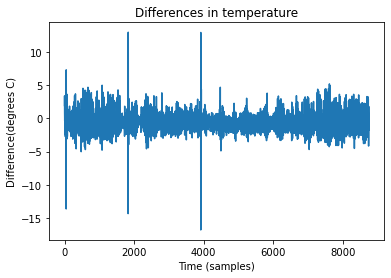

In [52]:
# Code for quantifying how good your predictions are
# We have MSE already, but a more tangible visualization would just be the difference between
# our prediction and the actual value at each timestep t. I will just use 16 filters for this
window_len = 16
tempDifs = []
weights, errors = normalized_lms(d, delayed, window_len, .2)
for n in range(window_len, len(delayed)-1):
    xWindow = np.flip(delayed[(n-(window_len-1)):(n+1)])
    pred = xWindow.dot(weights)
    tempDifs.append(d[n] - pred)

plt.plot(tempDifs)
plt.title('Differences in temperature')
plt.xlabel('Time (samples)')
plt.ylabel('Difference(degrees C)')

Most predictions hover within 5 ish degrees of the correct value. The big spikes are mostly from points we zeroed out that were erroneous measurements. We can go a little farther to quantify these errors:

In [53]:
from scipy.stats import norm

Stdev is: 1.2195170385787288
Mean is: -0.6247027937164272


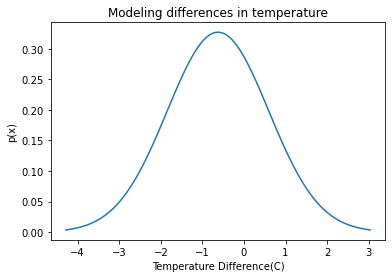

In [54]:
tempDifs = np.array(tempDifs)
mean = np.mean(tempDifs)
stdev = np.std(tempDifs)
print("Stdev is: "+ str(stdev))
print("Mean is: "+ str(mean))
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x, norm.pdf(x, mean, stdev))
plt.title('Modeling differences in temperature')
plt.xlabel('Temperature Difference(C)')
plt.ylabel('p(x)')
plt.show()

The standard deviation of my predictions is 1.21 and the mean -0.62. So, about 68% of predictions are within 1.21 degrees C of the actual temperature.

The mean should be zero. Being -.62 means that the model tends to underpredict temperatures by a significant amount!

The standard deviation is larger than I expected. Only about 50% of the predictions are within 1 degree of the true value. As a comparison, we can look at a super naive algorithm, that predicts the temperature in an hour as the current temp:

Stdev is: 1.217006251177118
Mean is: 0.0017579908675799073


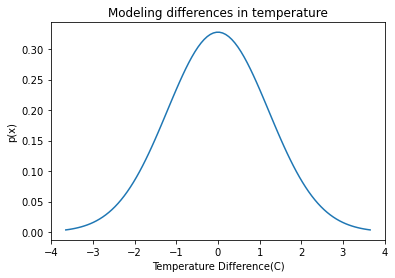

In [55]:
tempDifs2 = d - delayed[0:-1]
mean = np.mean(tempDifs2)
stdev = np.std(tempDifs2)
print("Stdev is: "+ str(stdev))
print("Mean is: "+ str(mean))
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 100)
plt.plot(x, norm.pdf(x, mean, stdev))
plt.title('Modeling differences in temperature')
plt.xlabel('Temperature Difference(C)')
plt.ylabel('p(x)')
plt.show()

The naive algorithm of predicting the temperature won't change generally performs better. It is much closer to zero mean, and has a smaller standard deviation

Overall, the performance of our LMS filter is very poor for temperature prediction. The algorithm tends to underpredict temperature(mean of -.6), is only within 1.2 degrees of the true temp 68% of the time, and performs worse than a naive filter that assumes temperature won't change. The LMS algorithm doesn't seem well suited for this problem.

**Interpreting the learned weights**\
Set the number of filter weights to 96, and look at the learned filter weights after running LMS on the data. Do the learned filter weights make sense? Include a plot of the filter weights and provide an interpretation.


In [56]:
weights96, errors96 = normalized_lms(d, delayed, 96, .1)
mse_traj96 = calcMSE(errors3)

100%|██████████| 7634/7634 [00:00<00:00, 176301.32it/s]


Text(0, 0.5, 'Weight value')

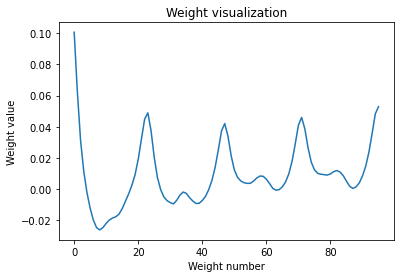

In [57]:
plt.plot(np.arange(96), weights96)
plt.title('Weight visualization')
plt.xlabel('Weight number')
plt.ylabel('Weight value')

The weights make sense! Weights near the front of the array have a large value, and then there is a repeating spike every day. The weights towards the front of the array are large since recent temperatures(within the past few hours) are strongly related to the temperature in an hour. Weights every 24 hours spike since the temperature values at the same time the previous day tend to be similar

While the locations of spikes make sense, some issues are clear. Intuitively, it doesn't make sense that the most recent temperature is only twice as important as the temperature 96 hours ago for a prediction(or that the temperature 23 hours ago and 96 hours ago are equally important). Using this many filters allowed LMS to overfit the weights for recent observations and increase weights from far in the past that shouldn't be this relevant. This is likely why increasing the number of filters decreased performance and LMS struggled with this task.